Import relevant packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Open cleaned medicare data csv file

In [39]:
e = pd.read_csv('r_g_mspb.csv')

In [40]:
e.head(1)

,Unnamed: 0,Hospital_Name_g,ZIP_Code_g,Type,Ownership_g,Emergency_Services_g,EHRs_g,Hospital_overall_rating_g,Safety_of_care_g,Patient_experience_g,...,Timeliness_of_care_g,Efficient_use_of_medical_imaging_g,Number_of_Discharges_r,Excess_Readmission_Ratio_r,Predicted_Readmission_Rate_r,Expected_Readmission_Rate_r,Number_of_Readmissions_r,MSPB,State_name,Region
0,0,SOUTHEAST ALABAMA MEDICAL CENTER,36301.0,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3.0,Above the National average,Below the National average,...,Same as the National average,Same as the National average,624.166667,1.041817,15.352883,14.956117,106.333333,0.999877,AL,US/Central


In [41]:
e.drop('Unnamed: 0', axis = 1, inplace = True) # auto added index

## Overview of medicare data set

In [42]:
e.sample(2)

,Hospital_Name_g,ZIP_Code_g,Type,Ownership_g,Emergency_Services_g,EHRs_g,Hospital_overall_rating_g,Safety_of_care_g,Patient_experience_g,Effectiveness_of_care_g,Timeliness_of_care_g,Efficient_use_of_medical_imaging_g,Number_of_Discharges_r,Excess_Readmission_Ratio_r,Predicted_Readmission_Rate_r,Expected_Readmission_Rate_r,Number_of_Readmissions_r,MSPB,State_name,Region
4246,KIMBLE HOSPITAL,76849.0,Critical Access Hospitals,Government - Hospital District or Authority,True,NaN,3.0,NaN,NaN,Same as the National average,Same as the National average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,US/Central
1475,FRANCISCAN HEALTH INDIANAPOLIS,46237.0,Acute Care Hospitals,Voluntary non-profit - Church,True,True,4.0,Above the National average,Above the National average,Above the National average,Below the National average,Same as the National average,631.0,0.93765,14.711583,16.407867,96.833333,0.996614,IN,US/Eastern


In [43]:
column_list = list(e.columns)
for loci, name in enumerate(column_list):
    print(loci, name)

(0, 'Hospital_Name_g')
(1, 'ZIP_Code_g')
(2, 'Type')
(3, 'Ownership_g')
(4, 'Emergency_Services_g')
(5, 'EHRs_g')
(6, 'Hospital_overall_rating_g')
(7, 'Safety_of_care_g')
(8, 'Patient_experience_g')
(9, 'Effectiveness_of_care_g')
(10, 'Timeliness_of_care_g')
(11, 'Efficient_use_of_medical_imaging_g')
(12, 'Number_of_Discharges_r')
(13, 'Excess_Readmission_Ratio_r')
(14, 'Predicted_Readmission_Rate_r')
(15, 'Expected_Readmission_Rate_r')
(16, 'Number_of_Readmissions_r')
(17, 'MSPB')
(18, 'State_name')
(19, 'Region')


## Explore the Data Set 

First, let's look performance parameters by hospital type. 
Readmissions are one metric to assess the performance of a medical center. Readmissions performance can be measured by a ratio, termed excess readmissions ratio, which is in this data set generated by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with patient profiles. An excess readmissions ratio greater than 1 is indicative of a greater than predicted readmissions rate (e.g. 'excess readmissions') whereas a ratio below 1 reflects better hospital readmissions performance. 

Acute Care Hospitals appear to have a worse mean excess readmissions ratio (i.e. > 1) relative to critical access hospitals.

## Patient Experience National Comparison

In [44]:
e.groupby(['Patient_experience_g']).describe(include = "objects")

Hospital_Name_g    ZIP_Code_g  \
Patient_experience_g                                                      
Above the National average   25%                      NaN  37830.000000   
                             50%                      NaN  54241.000000   
                             75%                      NaN  73120.000000   
                             count                   1217   1217.000000   
                             freq                       4           NaN   
                             max                      NaN  99701.000000   
                             mean                     NaN  53816.283484   
                             min                      NaN   1082.000000   
                             std                      NaN  24272.300453   
                             top           MERCY HOSPITAL           NaN   
                             unique                  1194           NaN   
Below the National average   25%                      NaN  26003.000000   
                             50%                      NaN  44394.500000   
                             75%                      NaN  85031.250000   
                             count                   1084   1084.000000   
                             freq                       4           NaN   
                             max                      NaN  99645.000000   
                             mean                     NaN  51488.267528   
                             min                      NaN    801.000000   
                             std                      NaN  31163.066744   
                             top     MERCY MEDICAL CENTER           NaN   
                             unique                  1060           NaN   
Same as the National average 25%                      NaN  30606.000000   
                             50%                      NaN  50314.000000   
                             75%                      NaN  74447.000000   
                             count                   1153   1153.000000   
                             freq                       7           NaN   
                             max                      NaN  99901.000000   
                             mean                     NaN  52069.601908   
                             min                      NaN   1040.000000   
                             std                      NaN  27070.532392   
                             top        MEMORIAL HOSPITAL           NaN   
                             unique                  1130           NaN   

                                                     Type  \
Patient_experience_g                                        
Above the National average   25%                      NaN   
                             50%                      NaN   
                             75%                      NaN   
                             count                   1217   
                             freq                     942   
                             max                      NaN   
                             mean                     NaN   
                             min                      NaN   
                             std                      NaN   
                             top     Acute Care Hospitals   
                             unique                     2   
Below the National average   25%                      NaN   
                             50%                      NaN   
                             75%                      NaN   
                             count                   1084   
                             freq                    1065   
                             max                      NaN   
                             mean                     NaN   
                             min                      NaN   
                             std                      NaN   
                             top     Acute Care Hospitals   
             

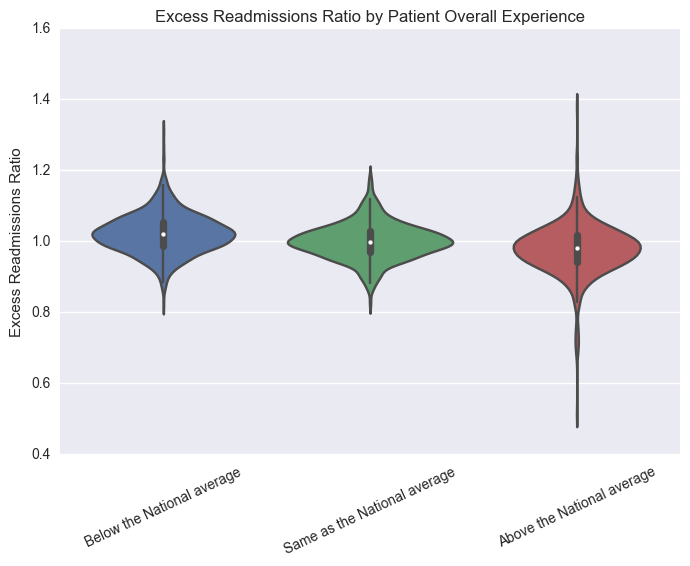

In [45]:
sns.violinplot(x = 'Patient_experience_g', y = 'Excess_Readmission_Ratio_r',split=True, data = e)
plt.ylabel('Excess Readmissions Ratio')
plt.xlabel('')
plt.xticks(rotation = 25)
plt.title('Excess Readmissions Ratio by Patient Overall Experience')
plt.show()

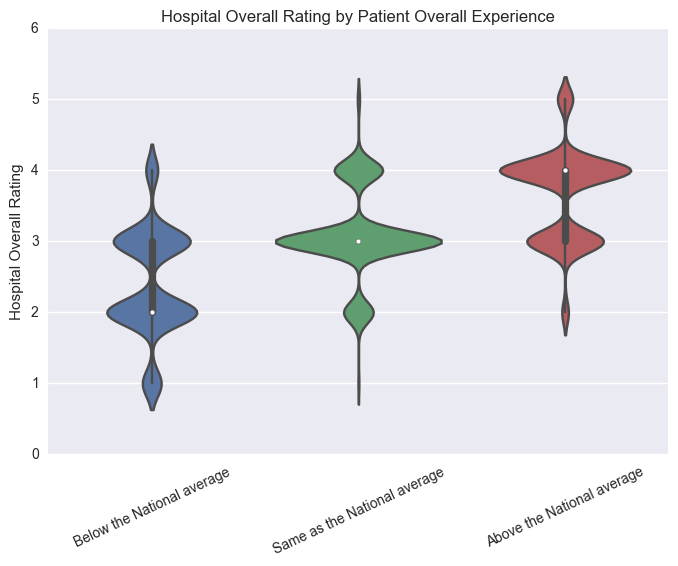

In [46]:
sns.violinplot(x = 'Patient_experience_g', y = 'Hospital_overall_rating_g', data = e)
plt.ylabel('Hospital Overall Rating')
plt.xlabel('')
plt.xticks(rotation = 25)
plt.title('Hospital Overall Rating by Patient Overall Experience')
plt.show()

In [47]:
type_patient_experience_camparison = e.groupby('Type').Patient_experience_g.describe(include = 'objects')

In [48]:
type_patient_experience_camparison

Type                             
Acute Care Hospitals       count                           3005
                           unique                             3
                           top       Below the National average
                           freq                            1065
Childrens                  count                              0
                           unique                             0
Critical Access Hospitals  count                            449
                           unique                             3
                           top       Above the National average
                           freq                             275
Name: Patient_experience_g, dtype: object

In [49]:
exprience_acute = e[e['Type'] == "Acute Care Hospitals"]['Patient_experience_g']
exprience_critical = e[e['Type'] == "Critical Access Hospitals"]['Patient_experience_g']

In [50]:
e_a = exprience_acute.value_counts()
e_a_index = list(e.Patient_experience_g.unique())
e_a_df = pd.DataFrame(e_a, index = e_a_index).reset_index()
e_a_df.columns.values[0] = 'Patient experience National Comparison' 
e_a_df.columns.values[1] = 'Acute Care Hospitals' 
e_a_df = e_a_df.dropna()
#e_a_df = e_a_df.reindex(index = e_a_df.index[::-1])
e_a_df

,Patient experience National Comparison,Acute Care Hospitals
0,Below the National average,1065.0
1,Same as the National average,998.0
3,Above the National average,942.0


## Test geo satisfaction

In [51]:
sat_region = pd.DataFrame(e.groupby('Region').Patient_experience_g.value_counts())
sat_region.columns.values[0] = 'Count'
sat_region = sat_region.reset_index()

In [52]:
sat_region.head()

,Region,Patient_experience_g,Count
0,America/Virgin,Below the National average,2
1,US/Alaska,Same as the National average,5
2,US/Alaska,Below the National average,3
3,US/Alaska,Above the National average,2
4,US/Central,Above the National average,553


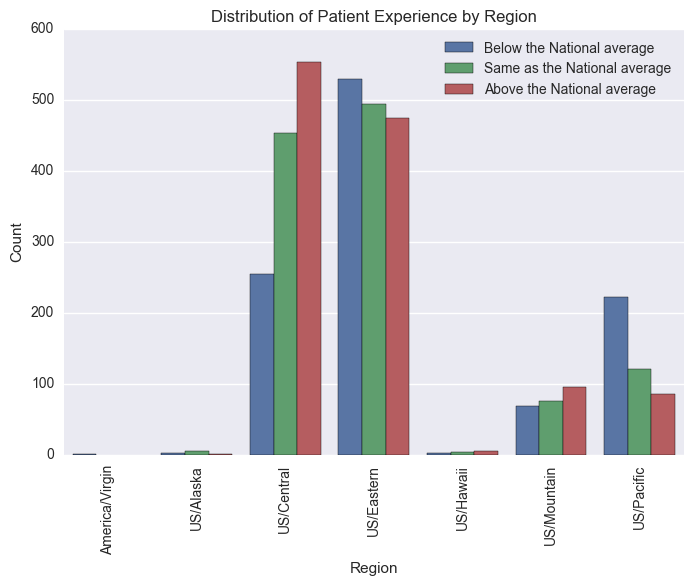

In [75]:
sns.barplot(x = 'Region', y = 'Count', hue = 'Patient_experience_g', data = sat_region)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Patient Experience by Region')
plt.xticks(rotation = 90)
plt.show()

## next look at features by region (type, ERR etc)

## Readmissions Analysis

In [54]:
e.groupby(['Type']).describe()

Excess_Readmission_Ratio_r  \
Type                                                          
Acute Care Hospitals      count                 3081.000000   
                          mean                     1.000752   
                          std                      0.061536   
                          min                      0.514200   
                          25%                           NaN   
                          50%                           NaN   
                          75%                           NaN   
                          max                      1.379900   
Childrens                 count                    0.000000   
                          mean                          NaN   
                          std                           NaN   
                          min                           NaN   
                          25%                           NaN   
                          50%                           NaN   
                          75%                           NaN   
                          max                           NaN   
Critical Access Hospitals count                   57.000000   
                          mean                     0.994717   
                          std                      0.037785   
                          min                      0.887060   
                          25%                           NaN   
                          50%                           NaN   
                          75%                           NaN   
                          max                      1.107617   

                                 Expected_Readmission_Rate_r  \
Type                                                           
Acute Care Hospitals      count                  3081.000000   
                          mean                     15.804030   
                          std                       2.864473   
                          min                       3.080000   
                          25%                            NaN   
                          50%                            NaN   
                          75%                            NaN   
                          max                      24.630900   
Childrens                 count                     0.000000   
                          mean                           NaN   
                          std                            NaN   
                          min                            NaN   
                          25%                            NaN   
                          50%                            NaN   
                          75%                            NaN   
                          max                            NaN   
Critical Access Hospitals count                    57.000000   
                          mean                     16.107647   
                          std                       1.080172   
                          min                      14.594825   
                          25%                            NaN   
                          50%                            NaN   
                          75%                            NaN   
                          max                      19.971733   

                                 Hospital_overall_rating_g         MSPB  \
Type                                                                      
Acute Care Hospitals      count                2987.000000  3165.000000   
                          mean                    3.005691     0.985220   
                          std                     0.844371     0.085568   
                          min                     1.000000     0.614360   
                          25%                          NaN          NaN   
                          50%                          NaN          NaN   
                          75%                          NaN          NaN   
                          max                     5.00

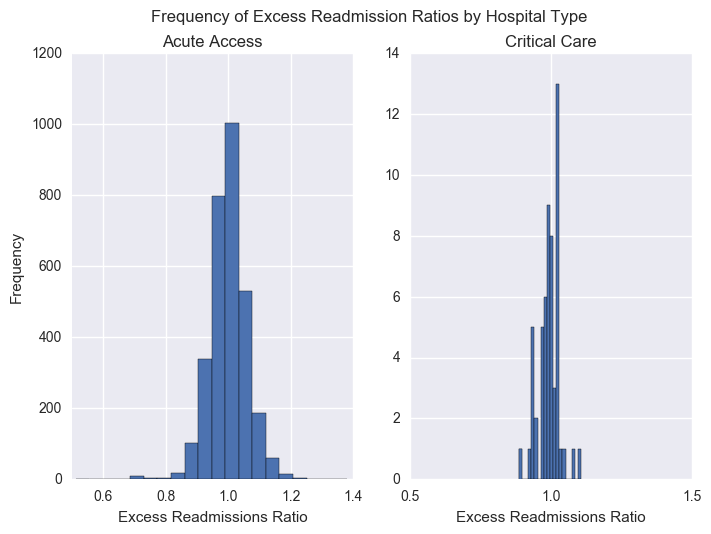

In [55]:
ERR_acute = e[e['Type'] == "Acute Care Hospitals"]['Excess_Readmission_Ratio_r']
ERR_critical = e[e['Type'] == "Critical Access Hospitals"]['Excess_Readmission_Ratio_r']


fig = plt.figure()

axes1 = fig.add_subplot(1,2,1)
axes1 = ERR_acute.hist(bins = 20)
plt.title('Acute Access')
axes1.set_xlabel('Excess Readmissions Ratio')
axes2 = fig.add_subplot(1,2,2)
axes1.set_ylabel('Frequency')
axes2 = ERR_critical.hist(bins = 20)
axes2.set_xlabel('Excess Readmissions Ratio')
plt.xticks(np.linspace(0.5, 1.5, 3))
plt.title('Critical Care')
fig.suptitle('Frequency of Excess Readmission Ratios by Hospital Type ')
plt.show()

In [56]:
e2 = e[e['Type'] != 'Childrens'] 

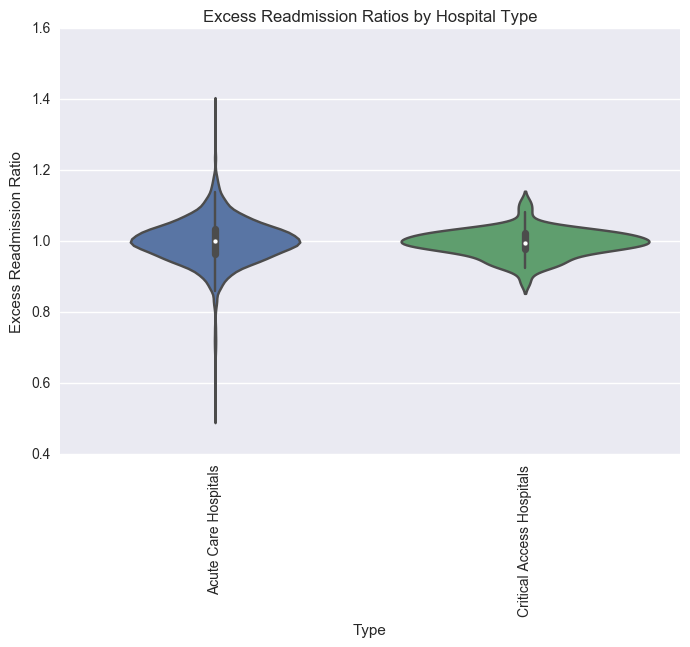

In [57]:
sns.violinplot(x = 'Type', y = 'Excess_Readmission_Ratio_r', data = e2)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Type')
plt.xticks(rotation = 90)
plt.title('Excess Readmission Ratios by Hospital Type')
plt.show()

In [58]:
ERR_acute_t_test = e['Type'] == "Acute care Hospitals"
ERR_critical_t_test = e['Type'] == "Critical Access Hospitals"

print('Critical access hospitals have significantly lower ERRs relative to acute care hospitals (p <0.05, 2-way t-test')
stats.ttest_ind(ERR_acute_t_test, ERR_critical_t_test)

Critical access hospitals have significantly lower ERRs relative to acute care hospitals (p <0.05, 2-way t-test


Ttest_indResult(statistic=-43.023499491092011, pvalue=0.0)

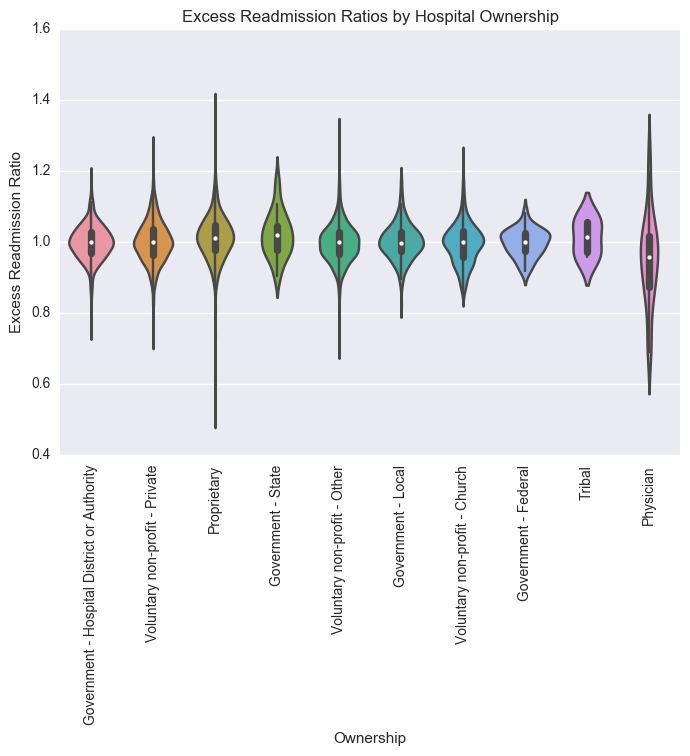

In [59]:
sns.violinplot(x = 'Ownership_g', y = 'Excess_Readmission_Ratio_r', data = e)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Ownership')
plt.xticks(rotation = 90)
plt.title('Excess Readmission Ratios by Hospital Ownership')
plt.show()

In [60]:
e_ownership_ERR = e.groupby('Ownership_g').Excess_Readmission_Ratio_r.mean()
e_ownership_ERR = pd.DataFrame(e_ownership_ERR).reset_index()
e_ownership_ERR

,Ownership_g,Excess_Readmission_Ratio_r
0,Government - Federal,0.996910
1,Government - Hospital District or Authority,0.998482
2,Government - Local,1.000204
3,Government - State,1.018645
4,Physician,0.951625
5,Proprietary,1.009173
6,Tribal,1.011250
7,Voluntary non-profit - Church,0.994477
8,Voluntary non-profit - Other,0.996624
9,Voluntary non-profit - Private,1.000619


In [61]:
print e_ownership_ERR[e_ownership_ERR['Excess_Readmission_Ratio_r'] >= 1]['Ownership_g']

2                Government - Local
3                Government - State
5                       Proprietary
6                            Tribal
9    Voluntary non-profit - Private
Name: Ownership_g, dtype: object


In [62]:
print e_ownership_ERR[e_ownership_ERR['Excess_Readmission_Ratio_r'] < 1]['Ownership_g']

0                           Government - Federal
1    Government - Hospital District or Authority
4                                      Physician
7                  Voluntary non-profit - Church
8                   Voluntary non-profit - Other
Name: Ownership_g, dtype: object


Hospitals categorized as Federal, State, Proprietary and Tribal appear to have worse excess readmissions ratios (i.e. > 1) relative to other hospital types.

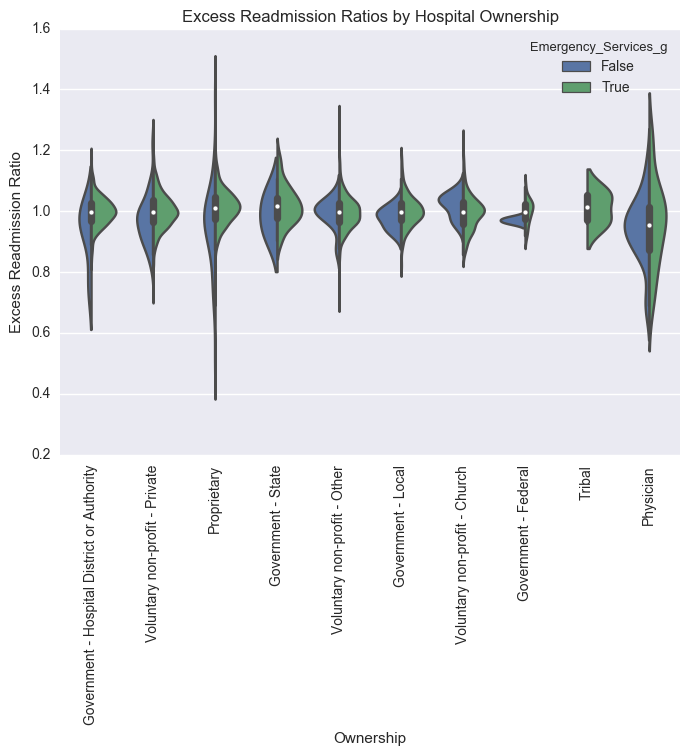

In [63]:
sns.violinplot(x = 'Ownership_g', y = 'Excess_Readmission_Ratio_r', hue ='Emergency_Services_g',split=True, data = e)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Ownership')
plt.xticks(rotation = 90)
plt.title('Excess Readmission Ratios by Hospital Ownership')
plt.show()

## As expected, institutions with a higher Overall Hospital Ratings have lower ERRs

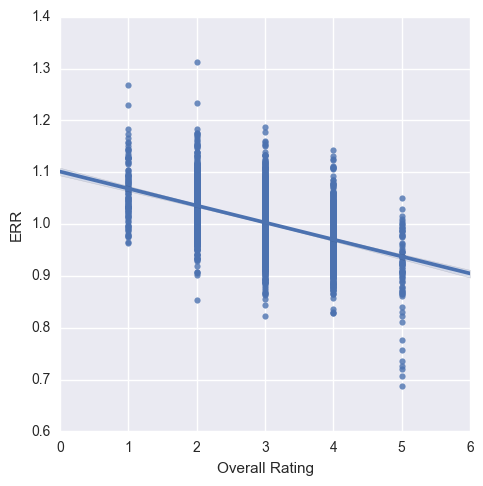

In [64]:
sns.lmplot(x = 'Hospital_overall_rating_g', y =  'Excess_Readmission_Ratio_r',  data = e)
plt.xlabel('Overall Rating')
plt.ylabel('ERR')
plt.show()

## However, this correlation differs by hospital ownership and type
* note: I should compute the coefficients for each.

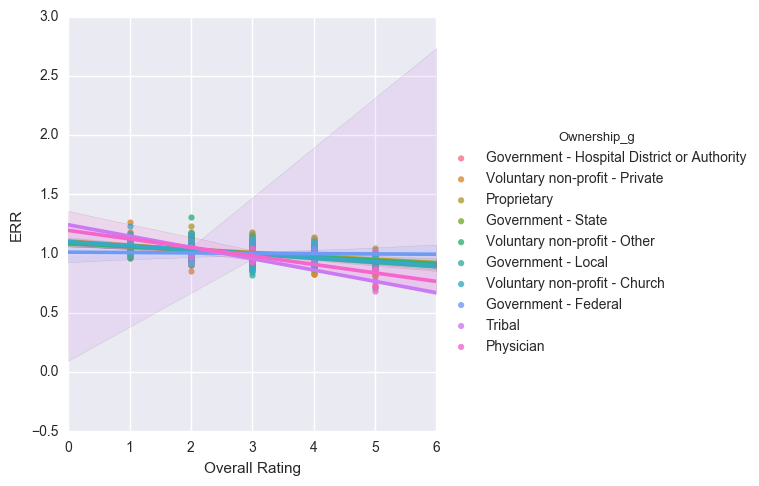

In [65]:
sns.lmplot(x = 'Hospital_overall_rating_g', y =  'Excess_Readmission_Ratio_r', hue = 'Ownership_g', data = e)
plt.xlabel('Overall Rating')
plt.ylabel('ERR')
plt.show()

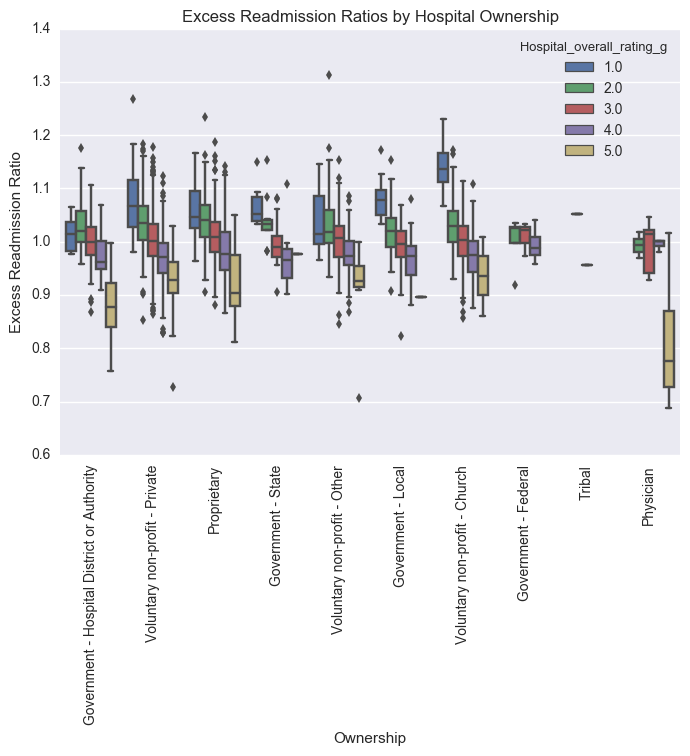

In [66]:
sns.boxplot(x = 'Ownership_g', y = 'Excess_Readmission_Ratio_r', hue ='Hospital_overall_rating_g', data = e)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Ownership')
plt.xticks(rotation = 90)
plt.title('Excess Readmission Ratios by Hospital Ownership')
plt.show()

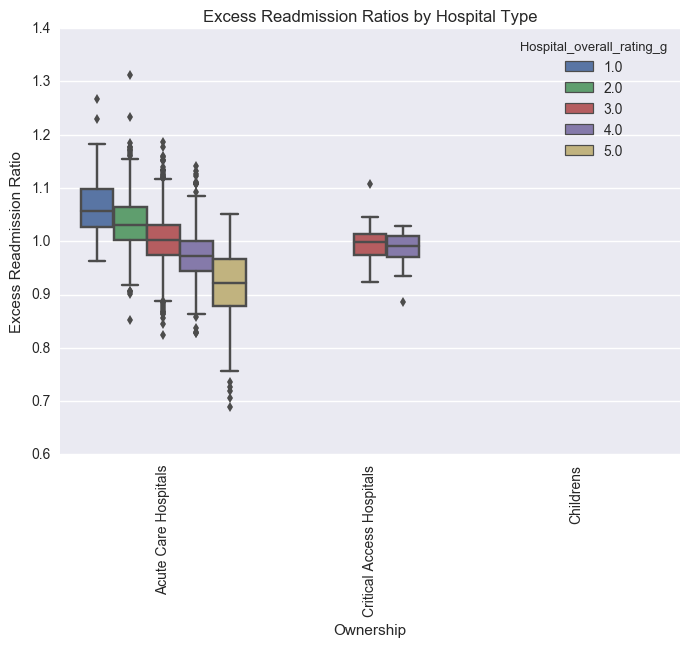

In [67]:
sns.boxplot(x = 'Type', y = 'Excess_Readmission_Ratio_r', hue ='Hospital_overall_rating_g', data = e)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Ownership')
plt.xticks(rotation = 90)
plt.title('Excess Readmission Ratios by Hospital Type')
plt.show()

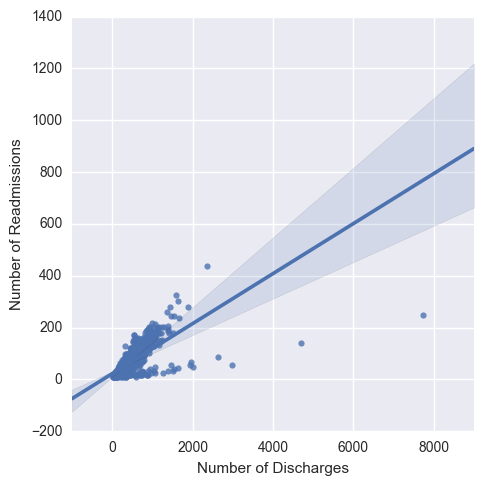

In [68]:
sns.lmplot(x = 'Number_of_Discharges_r', y =  'Number_of_Readmissions_r', data = e)
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.show()

The data look split into independent clusters. Let's evaluate by measure name. 

In [69]:
#sns.lmplot(x = 'Number_of_Discharges_r', y =  'Number_of_Readmissions_r', hue ='Measure_Name_r', data = explore)
#plt.title('Readmissions by Discharges for Measure Type')
#plt.xlabel('Number of Discharges')
#plt.ylabel('Number of Readmissions')
#plt.show()

For most measures, increase patient dicharges are associated with higher readmissions. However, Hip-Knee surgeries do not appear to correlate with a strong increase in readmission number. 

In [70]:
"""#explore2 = explore.dropna(how = 'any')
X = explore2[[]"Number_of_Readmissions_r", "Number_of_Discharges_r"]]
y = explore2['']

print X.shape
print y.shape"""

'#explore2 = explore.dropna(how = \'any\')\nX = explore2[[]"Number_of_Readmissions_r", "Number_of_Discharges_r"]]\ny = explore2[\'\']\n\nprint X.shape\nprint y.shape'

## Hospital Overall Rating
* Hospital type overall rating - table
* mean hospital rating by ownership type - table
* mean hospital rating by ownership type - barplot

In [71]:
e.columns

Index([u'Hospital_Name_g', u'ZIP_Code_g', u'Type', u'Ownership_g',
       u'Emergency_Services_g', u'EHRs_g', u'Hospital_overall_rating_g',
       u'Safety_of_care_g', u'Patient_experience_g',
       u'Effectiveness_of_care_g', u'Timeliness_of_care_g',
       u'Efficient_use_of_medical_imaging_g', u'Number_of_Discharges_r',
       u'Excess_Readmission_Ratio_r', u'Predicted_Readmission_Rate_r',
       u'Expected_Readmission_Rate_r', u'Number_of_Readmissions_r', u'MSPB',
       u'State_name', u'Region'],
      dtype='object')

In [72]:
type_rating = e.groupby('Type').Hospital_overall_rating_g.mean()
type_rating = pd.DataFrame(type_rating)
type_rating = type_rating.reset_index()
#print(type_rating)

print e.groupby('Type').Hospital_overall_rating_g.describe()

Type                            
Acute Care Hospitals       count    2987.000000
                           mean        3.005691
                           std         0.844371
                           min         1.000000
                           25%              NaN
                           50%              NaN
                           75%              NaN
                           max         5.000000
Childrens                  count       0.000000
                           mean             NaN
                           std              NaN
                           min              NaN
                           25%              NaN
                           50%              NaN
                           75%              NaN
                           max              NaN
Critical Access Hospitals  count     597.000000
                           mean        3.323283
                           std         0.562542
                           min         1.000000
       

In [73]:
OAR_acute = e[e['Type'] == "Acute Care Hospitals"]['Hospital_overall_rating_g']
OAR_critical = e[e['Type'] == "Critical Access Hospitals"]['Hospital_overall_rating_g']

In [74]:
OAR_type = plt.figure()

OAR_axs1 = fig.
OAR_acute.hist()
plt.title("Hospital Overall Rating - Acute Care Hospitals")
plt.xticks(np.linspace(1,5,5))
plt.show()

SyntaxError: invalid syntax (<ipython-input-74-9acc82754e02>, line 3)

In [ ]:
OAR_critical.hist()
plt.title("Hospital Overall Rating - Critical Access Hospitals")
plt.xticks(np.linspace(1,5,5))
plt.show()

In [ ]:
ownership_rating = e.groupby('Ownership_g').Hospital_overall_rating_g.mean()
ownership_rating = pd.DataFrame(ownership_rating)
ownership_rating = ownership_rating.reset_index()
ownership_rating.columns.values[0] = "Ownership"
ownership_rating.columns.values[1] = "Hospital Overall Rating"
ownership_rating

In [ ]:
sns.barplot(x = 'Ownership_g', y = 'Hospital_overall_rating_g', data = e)
plt.ylabel('Hospital Overall rating')
plt.xlabel('Ownership')
plt.title('Hospital Overall Rating by Ownership')
plt.xticks(rotation = 90)
plt.show()

## Attempt to compute one-way ANOVA P value 
* Is there a signficant difference between rating and ownership type?

## Hospital Safetey National Comparison

In [ ]:
# Attempt to compute one-way ANOVA P value   
from scipy import stats  

district = explore[explore['Hospital_Ownership_g'] == 'Government - Hospital District or Authority']['Hospital_overall_rating_g']
federal = explore[explore['Hospital_Ownership_g'] == 'Government - Federal']['Hospital_overall_rating_g']
physician = explore[explore['Hospital_Ownership_g'] == 'Physician']['Hospital_overall_rating_g']
state = explore[explore['Hospital_Ownership_g'] == 'Government - State']['Hospital_overall_rating_g']
local = explore[explore['Hospital_Ownership_g'] == 'Government - Local']['Hospital_overall_rating_g']
church = explore[explore['Hospital_Ownership_g'] == 'Voluntary non-profit - Church']['Hospital_overall_rating_g']
nonprofit_other = explore[explore['Hospital_Ownership_g'] == 'Voluntary non-profit - Other']['Hospital_overall_rating_g']
tribal = explore[explore['Hospital_Ownership_g'] == 'Tribal']['Hospital_overall_rating_g']
nonprofit_private = explore[explore['Hospital_Ownership_g'] == 'Voluntary non-profit - Private']['Hospital_overall_rating_g']

district.dropna(inplace = True)
federal.dropna(inplace = True)
physician.dropna(inplace = True)
state.dropna(inplace = True)
local.dropna(inplace = True)
church.dropna(inplace = True)
nonprofit_other.dropna(inplace = True)
tribal.dropna(inplace = True)
nonprofit_private.dropna(inplace = True)


#f_val, p_val = stats.f_oneway(distict, federal, physician, state,local, church, nonprofit_other,  tribal, nonprofit_private) 

#print "One-way ANOVA P =", p_val 

district.shape

In [ ]:
safety_acute = e[e['Type'] == "Acute Care Hospitals"]['Safety_of_care_g']
safety_critical = e[e['Type'] == "Critical Access Hospitals"]['Safety_of_care_g']

In [ ]:
s_a = safety_acute.value_counts()
s_a_index = list(e.Safety_of_care_g.unique())
s_a_df = pd.DataFrame(s_a, index = s_a_index).reset_index()
s_a_df.columns.values[0] = 'Safetey of Care National Comparison' 
s_a_df.columns.values[1] = 'Acute Care Hospitals' 
s_a_df = s_a_df.dropna()
s_a_df = s_a_df.reindex(index = s_a_df.index[::-1])
s_a_df

In [ ]:
sns.barplot(x = 'Safetey of Care National Comparison', y = 'Acute Care Hospitals', data = s_a_df)
plt.title('Acute Care Hospitals Safetey National Comparison')
plt.ylabel("Count")
plt.xlabel("")
plt.show()

In [ ]:
type_safety_camparison = e.groupby('Type').Safety_of_care_g.describe(include = 'objects')

In [ ]:
type_safety_camparison

In [ ]:
e_c = exprience_critical.value_counts()
e_c_index = list(explore.Patient_experience_national_comparison_g.unique())
e_c_df = pd.DataFrame(e_c, index = e_c_index).reset_index()
e_c_df.columns.values[0] = 'Patient experience National Comparison' 
e_c_df.columns.values[1] = 'Critical Access  Hospitals' 
e_c_df = e_c_df.dropna()
#e_a_df = e_a_df.reindex(index = e_a_df.index[::-1])
e_c_df

## Timeliness of Care National Comparison

In [ ]:
time_care_camparison = e.groupby('Type').Timeliness_of_care_g.describe(include = 'objects')

In [ ]:
time_care_camparison

In [ ]:
time_acute = e[e['Type'] == "Acute Care Hospitals"]['Timeliness_of_care_g']
time_critical = e[e['Type'] == "Critical Access Hospitals"]['Timeliness_of_care_g']

In [ ]:
t_a = time_acute.value_counts()
t_a_index = list(e.Timeliness_of_care_g.unique())
t_a_df = pd.DataFrame(t_a, index = t_a_index).reset_index()
t_a_df.columns.values[0] = 'Timeliness of Care National Comparison' 
t_a_df.columns.values[1] = 'Acute Care Hospitals' 
t_a_df = t_a_df.dropna()
t_a_df

In [ ]:
sns.barplot(x = 'Timeliness of Care National Comparison', y = 'Acute Care Hospitals', data = t_a_df)
plt.title('Acute Care Hospitals Timeliness of Care National Comparison')
plt.ylabel("Count")
plt.xlabel("")
plt.show()
# need to reorder index

In [ ]:
t_c = time_critical.value_counts()
t_c_index = list(e.Timeliness_of_care_g.unique())
t_c_df = pd.DataFrame(t_c, index = t_c_index).reset_index()
t_c_df.columns.values[0] = 'Critical Access Hospitals Timeliness of Care National Comparison' 
t_c_df.columns.values[1] = 'Critical Access Hospitals' 
t_c_df.iloc[2,1] = 0
t_c_df = t_c_df.dropna()
#t_a_df = t_a_df.reindex(index = t_a_df.index[2,0,1])
t_c_df

In [ ]:
sns.barplot(x = 'Critical Access Hospitals Timeliness of Care National Comparison', y = 'Critical Access Hospitals', data = t_c_df)
plt.title('Critical Access Hospitals Timeliness of Care National Comparison')
plt.ylabel("Count")
plt.xlabel("")
plt.show()
# need to reorder index

## Evaluate hospital information by US region

In [ ]:
e.groupby('Region').State_g.value_counts()

In [ ]:
e.groupby('Region').State_g.describe()

In [ ]:
e.groupby('Type').Region.value_counts()

In [ ]:
e.groupby('Region').Type.describe()

In [ ]:
type_region = pd.DataFrame(e.groupby('Region').Type.value_counts())
type_region.columns.values[0] = 'Count'
type_region = type_region.reset_index()

In [ ]:
type_region.head()

In [ ]:
sns.barplot(x = 'Region', y = 'Count', hue = 'Type', data = type_region)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Hospital Type by Region')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
e.groupby('Region').Ownership_g.describe()

In [ ]:
ownership_region = pd.DataFrame(e.groupby('Region').Ownership_g.value_counts())

In [ ]:
ownership_region.columns.values[0] = 'Count'

In [ ]:
ownership_region = ownership_region.reset_index()

In [ ]:
ownership_region.head()

In [ ]:
sns.barplot(x = 'Region', y = 'Count', hue = 'Ownership_g', data = ownership_region)
plt.legend(loc='upper left')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Hospital Ownership by Region')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
rating_region = pd.DataFrame(e.groupby('Region').Hospital_overall_rating_g.value_counts())

In [ ]:
rating_region.columns.values[0] = 'Count'

In [ ]:
rating_region = rating_region.reset_index()

In [ ]:
rating_region.head()

In [ ]:
rating_region.groupby('Region').mean()

In [ ]:
sns.barplot(x = 'Region', y = 'Count', hue = 'Hospital_overall_rating_g', data = rating_region)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Hospital Ratings by Region')
plt.xticks(rotation = 90)
plt.show()

## could highlight highest state (is this driven by california/ texas and florida?)